# Tennis Ball Finder

Now let's look at it in a class, which will find and mark the tennis ball on an image for us.

In [1]:
%matplotlib inline
from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
class BallDetector(object):
    # hsv colors to threshold on
    greenLower = (29, 86, 6)
    greenUpper = (64, 255, 255)
    diameter = 6.7  # diameter of average tennis ball in cm

    def __init__(self, lower=(29, 86, 6), upper=(64, 255, 255), diameter=6.7):
        """
        Tracks a ball in an image.
        """
        self.greenLower = lower
        self.greenUpper = upper
        self.diameter = diameter

    def distance(self, radius):
        return self.diameter

    def find(self, frame):
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # threshold and find the tennis ball
        mask = cv2.inRange(hsv, self.greenLower, self.greenUpper)

        # do some morphological operators to fill in mask gaps and remove
        # outliers (false positives)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)

        # find contours in the mask
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        center = None
        radius = 0

        # did we find something?
        if len(cnts) > 0:
            # find the largest contour in the mask, then use
            # it to compute the minimum enclosing circle and
            # centroid
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)

            # only proceed if the radius meets a minimum size
            if radius > 10:
                # find moments -----------
                # M = cv2.moments(c)
                # center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
                # cv2.circle(frame, center, 5, (0, 0, 255), -1)

                # set center and radius of ball
                center = (int(x), int(y))
                radius = int(radius)

        return center, radius

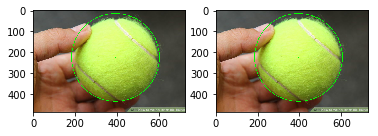

In [6]:
a = cv2.imread('tennis/test6.jpg')
b = cv2.imread('tennis/test3.jpg')

bt = BallDetector()

loc = []
for im in [a,b]:
    c, r = bt.find(im)
    cv2.circle(im,c,r,(0,255,0),2)
    cv2.circle(im,c,1,(0,255,0),2)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));

Now, for a given situation, you will have to do a lot testing to get the right color bounds. HSV helps with lighting, but there is a limit to how much it will be able to compensate for.